In [1]:
'''Import necessary libraries'''
import pandas as pd # handling CSV files
import matplotlib.pyplot as plt # plotting
import numpy as np # numerical computations
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.linear_model import LinearRegression # linear regression algorithm
from sklearn.metrics import mean_squared_error, mean_absolute_error # regression metrics

In [2]:
'''Reading the dataset - house_prices.csv'''
df = pd.read_csv('house_prices.csv') # read the data
df.head() # display the first 5 rows of the data

,Size,Price
0,1360,1169.012279
1,1794,1927.392846
2,1630,1630.883233
3,1595,1557.012280
4,2138,2528.605411


In [3]:
df.shape # display the number of rows and columns in the data

(100, 2)

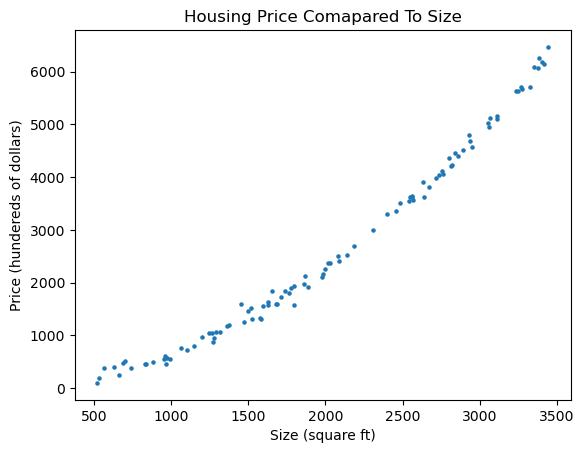

In [4]:
'''Vizualizing with a scatter plot'''
plt.scatter(df['Size'], df['Price'], s=5) # plot the data and decrease the size of the points
plt.xlabel('Size (square ft)') # label the x-axis
plt.ylabel('Price (hundereds of dollars)') # label the y-axis
plt.title('Housing Price Comapared To Size') # title the plot
plt.show() # show the plot

In [5]:
'''Seperate the data into X and y values'''
X = df[['Size']]  # Feature
y = df['Price'] # Label
X = X.values.reshape(-1,1) # reshape the data and change into numpy array
y = y.values.reshape(-1,1) # reshape the data and change into numpy array
print(f"Shape: {X.shape} Sample:{y.shape}") # Display the shape of the data
print(f"X:\n{X[:5]}\ny:\n{y[:5]}") # Display the first 5 rows of the data

Shape: (100, 1) Sample:(100, 1)
X:
[[1360]
 [1794]
 [1630]
 [1595]
 [2138]]
y:
[[1169.01227947]
 [1927.39284596]
 [1630.88323301]
 [1557.01227972]
 [2528.60541099]]


In [6]:
'''Splitting the data for training and testing (test_size = 0.15, random_state = 42)'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape, X_test.shape, type(X_train)) # Display the sample number for train and test

(85, 1) (15, 1) <class 'numpy.ndarray'>


In [7]:
# Use the standard linear regression algorithm to develop a solution
linreg = LinearRegression()  # Instantiate a LinearRegression object
linreg.fit(X_train, y_train)  # Build a model from the training data


# Predict the training and testing data
train_pred = linreg.predict(X_train) # Predict y_train from X_train
test_pred = linreg.predict(X_test) # Predict on the retained test values
print(f"Predicted values for the test data are:\n{test_pred}") # Display the predicted values

Predicted values for the test data are:
[[4388.19778591]
 [5396.2280403 ]
 [ 949.15901782]
 [4117.85287361]
 [5530.35264795]
 [2133.22781975]
 [1959.2849692 ]
 [ 431.52186016]
 [3952.29281104]
 [1280.27914296]
 [4576.81051542]
 [4838.77263974]
 [2787.08528206]
 [1521.28429734]
 [1076.99653449]]


In [8]:
'''Compute training metrics'''
rmse_train = np.sqrt(mean_squared_error(train_pred, y_train)) # Compute the RMSE for the model
mae_train = mean_absolute_error(train_pred, y_train) # Compute the MAE for the model

print(f"Root Mean Squared Error of our model: {rmse_train}") # Display the RMSE
print(f"Mean Absolute Error of our model: {mae_train}") # Display the MAE

Root Mean Squared Error of our model: 335.57064212056986
Mean Absolute Error of our model: 276.0764699966475


In [9]:
'''Compute testing metrics'''
rmse_test = np.sqrt(mean_squared_error(test_pred, y_test)) # Compute the RMSE for the test data
mae_test = mean_absolute_error(test_pred, y_test) # Compute the MAE for the test data

print(f"Root Mean Squared Error of our test: {rmse_test}") # Display the RMSE
print(f"Mean Absolute Error of our test: {mae_test}") # Display the MAE


Root Mean Squared Error of our test: 275.6521010950377
Mean Absolute Error of our test: 212.3019264300168


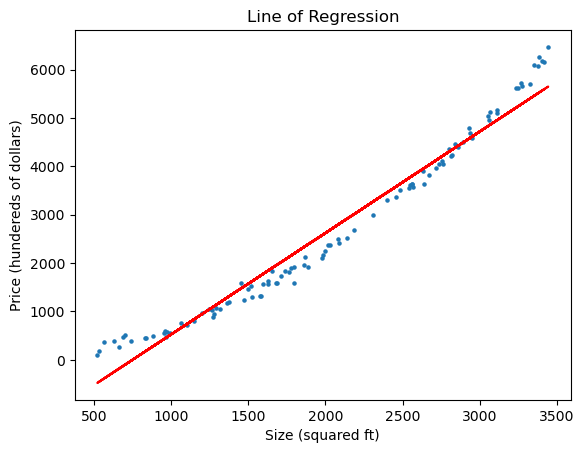

In [10]:
# Draw the line of linear regression, check visually if it fits well
plt.scatter(X, y, s=5) # plot the data
plt.plot(X, linreg.predict(X), color='red') # plot the linear regression line
plt.xlabel('Size (squared ft)') # label the x-axis
plt.ylabel('Price (hundereds of dollars)') # label the y-axis
plt.title('Line of Regression') # title the plot
plt.show() # show the plot

In [11]:
'''Add a polynoial feature and create a new dataset'''
new_df = df.copy() # copy the data (good practice to avoid changing the original data)
X_poly = new_df.drop('Price', axis=1) # drop the price column to only have the features
X_poly['Size^2'] = X_poly['Size']**2 # add a new column with the square of the size
print(X_poly.head()) # display the first 5 rows of the new data


   Size   Size^2
0  1360  1849600
1  1794  3218436
2  1630  2656900
3  1595  2544025
4  2138  4571044


In [12]:
'''Repeat the model building process and check the metrics again'''

# Splitting the data for training and testing (test_size = 0.15, random_state = 42)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.15, random_state=42)
print(X_train.shape, X_test.shape, type(X_train)) # Display the sample number for train and test

(85, 1) (15, 1) <class 'numpy.ndarray'>


In [13]:
'''Use the standard linear regression algorithm to develop a NEW solution'''
linreg_poly = LinearRegression()  # Instantiate a LinearRegression object
linreg_poly.fit(X_poly_train, y_train)  # Build a model from the training data

# Predict the training and testing data
train_poly_pred = linreg_poly.predict(X_poly_train) # Predict y_train from X_train
test_poly_pred = linreg_poly.predict(X_poly_test) # Predict on the retained test values
print(f"Predicted values for the test data are:\n{test_poly_pred}") # Display the predicted values

Predicted values for the test data are:
[[4378.32059752]
 [5888.05742721]
 [ 905.05565428]
 [4011.32825191]
 [6105.7392739 ]
 [1808.05682772]
 [1656.1322019 ]
 [ 606.90632389]
 [3794.49648726]
 [1126.59938733]
 [4643.8563054 ]
 [5025.60190016]
 [2438.51313061]
 [1302.97290989]
 [ 987.73807354]]


In [14]:
'''Compute metrics for the training data'''
rmse_poly_train = np.sqrt(mean_squared_error(train_poly_pred, y_train)) # Compute the RMSE for the model
mae_poly_train = mean_absolute_error(train_poly_pred, y_train) # Compute the MAE for the model
print(f"Root Mean Squared Error of our model: {rmse_poly_train}") # Display the RMSE
print(f"Mean Absolute Error of our model: {mae_poly_train}") # Display the MAE

Root Mean Squared Error of our model: 94.99004396947893
Mean Absolute Error of our model: 74.03639402352466


In [15]:
'''Compute metrics for test data'''
rmse_poly_test = np.sqrt(mean_squared_error(test_poly_pred, y_test)) # Compute the RMSE for the test data
mae_poly_test = mean_absolute_error(test_poly_pred, y_test) # Compute the MAE for the test data
print(f"Root Mean Squared Error of our test: {rmse_poly_test}") # Display the RMSE
print(f"Mean Absolute Error of our test: {mae_poly_test}") # Display the MAE

Root Mean Squared Error of our test: 91.66119179477982
Mean Absolute Error of our test: 78.39875981537384


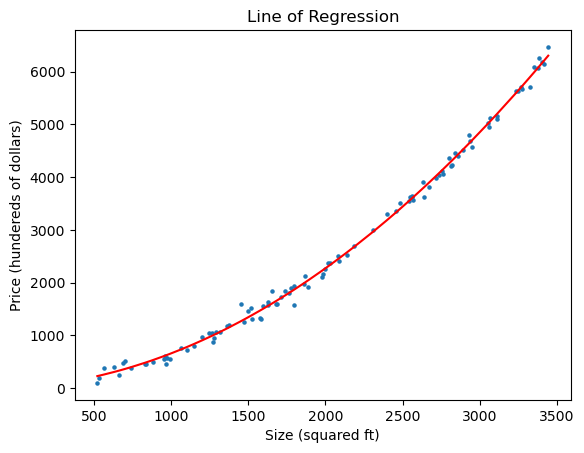

In [16]:
'''If you want to see it as a line you need to sort the data in ascending order'''

# Get the indices of the data in ascending order of the feature 'Size'
sorted_indicies = np.argsort(np.array(X_poly['Size'])) #  get the indices of the data in ascending order of the feature 'Size'
X_sorted = np.array(X_poly['Size'])[sorted_indicies] # sort the data in ascending order for the feature size
predictions = linreg_poly.predict(X_poly)[sorted_indicies] # Predict the values of the prices and sort it in the ascending order with same indicies
plt.scatter(X_poly['Size'], y, s=5) # plot the data
plt.plot(X_sorted, predictions, color='red') # plot the linear regression line
plt.xlabel('Size (squared ft)') # label the x-axis
plt.ylabel('Price (hundereds of dollars)') # label the y-axis
plt.title('Line of Regression') # title the plot
plt.show() # show the plot

1. The RMSE value on the original data was approximately 275.65. When comparing it to the mean of y (2660.16), the deviation is approximately 1/10 of the mean, which is relatively high. This means that the RMSE value on the original data was poor as it suggests that the original linear regression model did not adequetly capture the relationship between the Size and Price of the homes.
2. The regression line did not fit well. According to the second scatter plot, the linear line of best fit did not fit well with the curved shape of the actual data. This shows that the regression line did not fit well, which is further confirmed by the RMSE value as explained in the answer to the first question.
3. I added a polynomial feature to the dateset with a degree of 2 to capture behavior of the graph which looked like the right side of a quadratic graph.
4. The RMSE decreased by 67% from 275.65 to 91.66. The MAE decreased by 63% from 212/30 to 78.40. These are substaintial reductions, indicating that the polynomial regression model fits the data much better than the linear regression model.
5. The RMSE is more sensitive due to the squaring of each error term. Thus, it explains why the RMSE had a more substaintial decrease than the MAE.
6. Challenges included understanding how to graph the quadratic line of best fit with matplotlib and understanding the concept of linear regression. I learned that if there is a visible non-linear relationship, you can use polynomial regression to add a feature so that the line of best fit fits the graph. I also learned how vizualization of the data is just as important as the code as I probably would ot have caught that the RMSE and MAE values were too high without looking at the actual scatter plot to see that a quadratic line of best fit would be a better fit than a linear one